# Sender

In [17]:
# imported libraries
import cv2 as cv
import matplotlib.pyplot as plt
from calculation import *
from encrypt import *

In [18]:
# read an image file
img = cv.imread('test-images/miscellaneous/4.1.04.tiff', cv.IMREAD_GRAYSCALE)
# img = cv.imread('test-images/aerials/2.1.01.tiff', cv.IMREAD_GRAYSCALE)
print(img.dtype)

uint8


Text(0.5, 1.0, 'original')

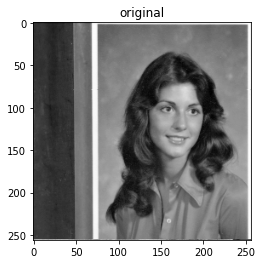

In [19]:
# showing image using matplotlib
plt.imshow(img, cmap='gray')
plt.title('original')

In [20]:
# getting image height and width
height = img.shape[0]
width = img.shape[1]
print("height: {}, width: {}".format(height, width))

height: 256, width: 256


## Bitplanes decomposition

In [21]:
# obtaining bitplanes
bitplane_images = bitplane_decomposition(img, height, width)
titles = ['bitplane8',
          'bitplane7',
          'bitplane6',
          'bitplane5',
          'bitplane4',
          'bitplane3',
          'bitplane2',
          'bitplane1']

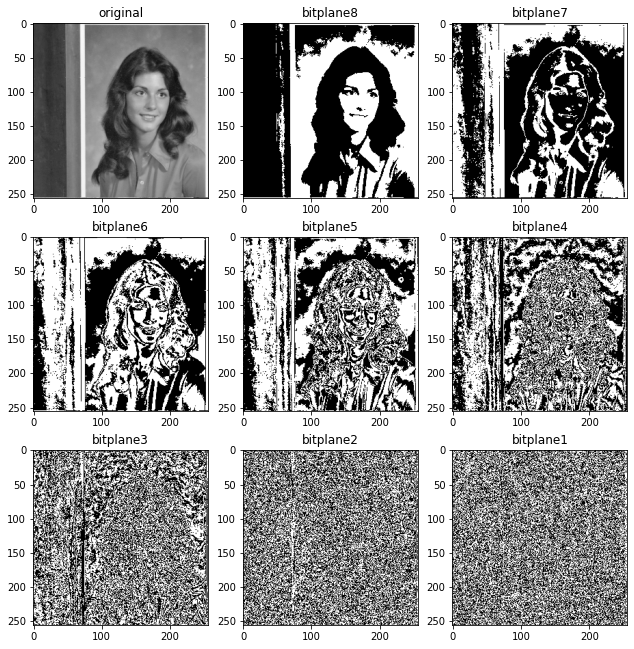

In [22]:
# viewing bitplane images
plt.subplot(3,3,1)
plt.title('original')
plt.imshow(img, cmap='gray', vmin=0, vmax=255)

for i in range(8):
    plt.subplot(3,3,i+2)
    plt.title(titles[i])
    plt.imshow(convert_to_255(bitplane_images[i]), cmap='gray', vmin=0, vmax=255)

plt.subplots_adjust(bottom=0.1, right=1.5, top=2.2)

## Generating cipher bitplane images

x=0.88, y=0.81


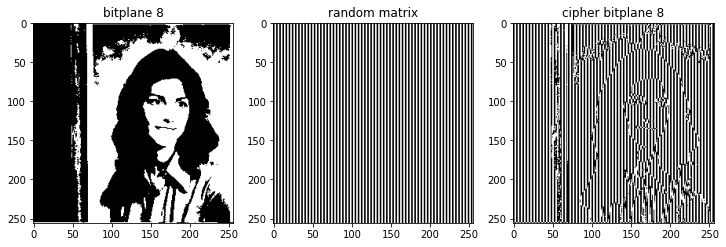

In [23]:
# getting cypher images for bitplane images up to its significance level
x = 0.78
y = 0.98

plt.subplot(1,3,1)
plt.title('bitplane 8')
plt.imshow(convert_to_255(bitplane_images[0]), cmap='gray')
x,y,mat = get_random_matrix(x, y, height, width)
plt.subplot(1,3,2)
plt.title('random matrix')
plt.imshow(convert_to_255(mat), cmap='gray')
cbp8 = cv.bitwise_xor(bitplane_images[0], mat)
plt.subplot(1,3,3)
plt.title('cipher bitplane 8')
plt.imshow(convert_to_255(cbp8), cmap='gray')
plt.subplots_adjust(bottom=0.1, right=1.7, top=2.2)

print('x={}, y={}'.format(x,y))

In [24]:
x = 0.78
y = 0.98
cipher_bitplane_images = []

for i in range(4):
    x, y, random_matrix = get_random_matrix(x, y, height, width)
    cipher_bitplane_image = xor_matrix(random_matrix, bitplane_images[i])
    cipher_bitplane_images.append(cipher_bitplane_image)

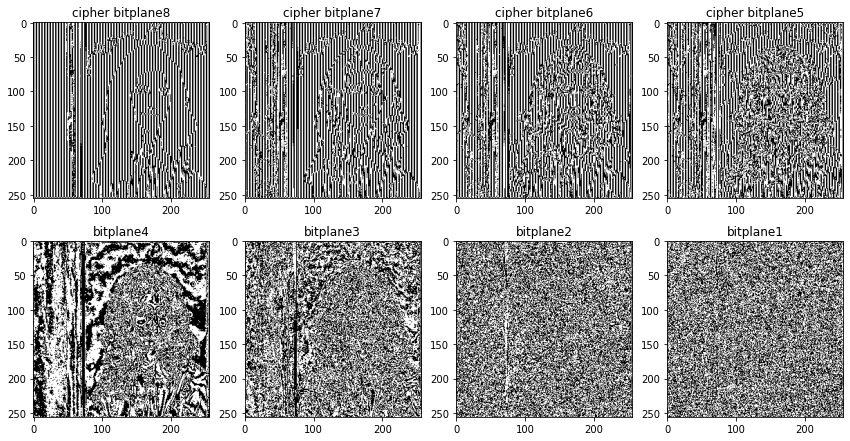

In [25]:
# cipher image composition
for i in range(len(cipher_bitplane_images)):
    bitplane_images[i] = cipher_bitplane_images[i]

titles = ['cipher bitplane8',
          'cipher bitplane7',
          'cipher bitplane6',
          'cipher bitplane5',
          'bitplane4',
          'bitplane3',
          'bitplane2',
          'bitplane1']
for i in range(8):
    plt.subplot(2,4,i+1)
    plt.title(titles[i])
    plt.imshow(convert_to_255(bitplane_images[i]), cmap='gray', vmin=0, vmax=255)

plt.subplots_adjust(bottom=.01, right=2, top=1.4)

## Cipher image composition

In [26]:
# composition of cipher images
cipher_image = cipher_image_composition(bitplane_images, height, width)

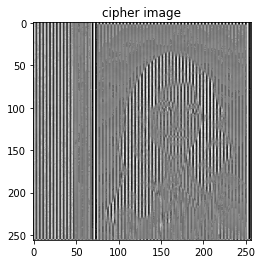

In [42]:
# write the output image
cv.imwrite('cipherImage.tiff', cipher_image)
plt.title('cipher image')
plt.imshow(cipher_image, cmap='gray', vmin=0, vmax=255)

In [29]:
# last generated values of x, y and u
print('x= {}'.format(x))
print('y= {}'.format(y))

x= 0.88
y= 0.81


## Testing

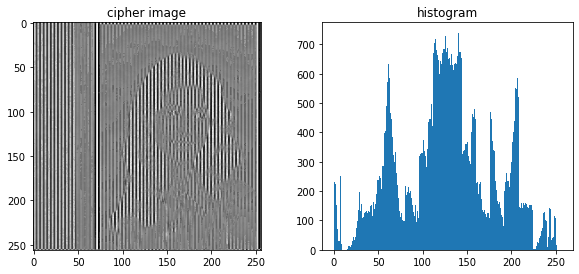

In [38]:
# histogram analysis
plt.subplot(1,2,1)
plt.title('cipher image')
plt.imshow(cipher_image, cmap='gray', vmin=0, vmax=255)
plt.subplot(1,2,2)
plt.title('histogram')
plt.hist(cipher_image.ravel(), 256, [0,256])
plt.subplots_adjust(bottom=.01, right=1.4, top=.8)

In [30]:
# corellation coefficient for original image
corr = float('{:.2f}'.format(
    cv.matchTemplate(
        img,
        horizontal_adj(img, height, width),
        cv.TM_CCORR_NORMED)[0][0]))
print('Corellation coefficient of original image: {}'.format(corr))

Corellation coefficient of original image: 1.0


In [31]:
# corellation coefficient for cipher image
corr = float('{:.2f}'.format(
    cv.matchTemplate(
        cipher_image,
        horizontal_adj(cipher_image, height, width),
        cv.TM_CCORR_NORMED)[0][0]))
print('Corellation coefficient of cipher image: {}'.format(corr))

Corellation coefficient of cipher image: 1.0


In [33]:
# calculate entropy of the image
print('Entropy of the cipher image is: {:.2f}'.format(entropy(cipher_image)))

Entropy of the cipher image is: 7.94
